# Problem 2 - Answers

In your lectures you have derived approximate solutions to the Fermi-Dirac integrals for counting electrons and holes in semiconductors. In the derivation you assumed that $E_{c0}-E_f >> k_bT$ and $E_f - E_{v0} >> k_bT$ so you could use the  Boltzmann approximation. In this question you will explore the range of scenarios under which this approximation is valid.

Consider the intrinsic semiconductor AlSb. At 300K it has an energy gap of 1.615 eV and an
electron effective mass of $m_n* = 0.12 m_e$.

1. Using both the full Fermi-Dirac integral, and the Boltzmann approximation calculate the number of electrons in the conduction band at 300K. What is the difference between these values? Is the Boltzmann approximation valid a room temperature.

2. Produce a graph of number of electrons in the conduction band as a function of temperature using both the full Fermi-Dirac integral and the Boltzmann approximation. At what temperature does the Boltzmann approximation become inaccurate?

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import quad

In [2]:
# Define necessary constants
kb = 1.380649e-23  # Joules per Kelvin
hbar = 1.0545718e-34
me = 9.10938356e-31

In [3]:
# Define Fermi-Dirac and Boltzman distributions
def fermi_dirac(E, Ef, T):
    """
    Fermi-Dirac distribution
    E  - energy
    Ef - Fermi energy
    T  - Temperature (K)
    """
    exponent = (E-Ef)/(kb*T)
    fermi_dirac = 1/(1+np.exp(exponent))
    return fermi_dirac

def boltzman(E, Ef, T):
    """
    Boltzman distribution
    E  - energy
    Ef - Fermi energy
    T  - Temperature (K)
    """
    exponent = (E-Ef)/(kb*T)
    boltzman = np.exp(-exponent)
    return boltzman

# Define density of states for holes and carriers
# These densities of states use the parabolic band approximation
def density_of_states_electrons(E, m, Ec0):
    """
    Density of states for electrons
    in the parabolic band approximation
    E   - energy
    m   - effective mass of electron
    Ec0 - energy at bottom of conduction band
    """
    density = (1/(2*np.pi**2))*((2*m)/(hbar**2))**(3/2)*np.sqrt(E-Ec0)
    return density

# Define fermi-dirac and boltzman integrals for electrons
def integrand_electrons(E, m, Ec0, Ef, T):
    return density_of_states_electrons(E, m, Ec0)*fermi_dirac(E, Ef, T)

def integrand_electrons_boltzman(E, m, Ec0, Ef, T):
    return density_of_states_electrons(E, m, Ec0)*boltzman(E, Ef, T)    

1. Using both the full Fermi-Dirac integral, and the Boltzmann approximation calculate the number of electrons in the conduction band and number holes in the valance band. What is the difference between these values? Is the Boltzmann approximation valid a room temperature.

In [4]:
T = 300
Eg = 1.615  # in eV
Eg = Eg * 1.602176634e-19  # in joules
mn = 0.12 * me

# The absolute value of Ec and Ev don't matter for this question so I will take Ev to be 1.5e-18 J
Ev = 1.5e-18
Ec = 1.5e-18 + Eg
Ef = (Ec + Ev)/2

# # Calculate fermi-dirace integral for conduction band at 300K
number_electrons, uncertainty_electrons = quad(integrand_electrons, Ec, Ec*5, args=(mn, Ec, Ef, T))
number_electrons_boltzmann, uncertainty_electrons_boltzmann = quad(integrand_electrons_boltzman, Ec, Ec*5, args=(mn, Ec, Ef, T))

print("Fermi-Dirac:")
print("Number of electrons = %.3e +/- %.3e" % (number_electrons, uncertainty_electrons))

print("Boltzmann:")
print("Number of electrons = %.3e +/- %.3e" % (number_electrons_boltzmann, uncertainty_electrons_boltzmann))

print("Difference:")
print("%.3e" % np.abs(number_electrons - number_electrons_boltzmann))
print("%.2f %%" % (np.abs((number_electrons - number_electrons_boltzmann)/number_electrons) * 100))

Fermi-Dirac:
Number of electrons = 2.838e+10 +/- 2.264e+02
Boltzmann:
Number of electrons = 2.838e+10 +/- 2.264e+02
Difference:
2.747e-04
0.00 %


C:\Users\Lloyd\anaconda3\envs\dscore\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


The Boltzmann approximation is the same as the full Fermi-Dirac integral at low temperature.

2. Produce a graph of number of electrons in the conduction band as a function of temperature using both the full Fermi-Dirac integral and the Boltzmann approximation. At what temperature does the Boltzmann approximation become inaccurate?

C:\Users\Lloyd\anaconda3\envs\dscore\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


At a temperature of 3e+03K the percentage difference is 1%
At a temperature of 8e+03K the percentage difference is 10%


C:\Users\Lloyd\anaconda3\envs\dscore\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Lloyd\anaconda3\envs\dscore\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


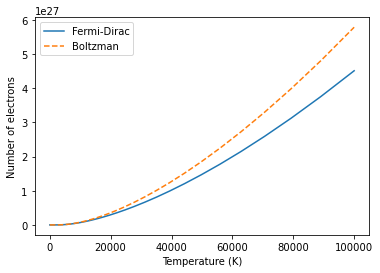

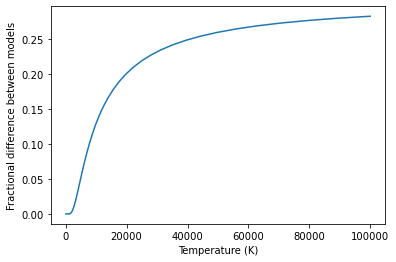

In [5]:
Eg = 1.615  # in eV
Eg = Eg * 1.602176634e-19  # in joules
mn = 0.12 * me

# The absolute value of Ec and Ev don't matter for this question so I will take Ev to be 1.5e-18 J
Ev = 1.5e-18
Ec = 1.5e-18 + Eg
Ef = (Ec + Ev)/2
temps = np.logspace(0, 5, 100)

densities = []
densities_boltzman = []

for temp in temps:
    density, _ = quad(integrand_electrons, Ec, Ec*10, args=(mn, Ec, Ef, temp))
    density_approx, _ = quad(integrand_electrons_boltzman, Ec, Ec*10, args=(mn, Ec, Ef, temp))
    densities.append(density)
    densities_boltzman.append(density_approx)
    
fractional_change = np.abs((np.array(densities)-np.array(densities_boltzman))/np.array(densities))

#Set nan and inf values to zero
fractional_change = np.where(np.isnan(fractional_change), 0, fractional_change)
fractional_change = np.where(np.isinf(fractional_change), 0, fractional_change)

# Calculate when change is more than 1 and 10%
i_1 = next(idx for idx, val in enumerate(fractional_change) if val > 0.01)
T_1 = temps[i_1]

i_10 = next(idx for idx, val in enumerate(fractional_change) if val > 0.1)
T_10 = temps[i_10]

print("At a temperature of %.0eK the percentage difference is 1%%" % T_1)
print("At a temperature of %.0eK the percentage difference is 10%%" % T_10)

fig1, ax1 = plt.subplots(1,1)
ax1.plot(temps, densities, label="Fermi-Dirac")
ax1.plot(temps, densities_boltzman, "--", label="Boltzman")
ax1.legend()
ax1.set(xlabel="Temperature (K)", ylabel="Number of electrons")

fig2, ax2 = plt.subplots(1,1)
ax2.plot(temps, fractional_change)
ax2.set(xlabel="Temperature (K)", ylabel="Fractional difference between models")
plt.show()